<a href="https://colab.research.google.com/github/AndresCMontejo/Telecom_X/blob/main/TelecomX_An%C3%A1lisis_de_evasi%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANALISIS DE EVASIÓN DE CLIENTES**

### **Extracción de datos**

In [2]:
import pandas as pd
import requests
import json
datos_clientes = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
resultado = json.loads(datos_clientes.text)
df = pd.DataFrame(resultado)
df.to_json('TelecomX_ClientesT', orient='records')
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

### **INTRODUCCIÓN**

El análisis de datos es una parte fundamental para las empresas, ya que ayudan a través de gráficos entender alguna problemática que se esté presentando a lo largo del tiempo, ayudan a entender tendencias, comportamientos, y lo más importante, la cantidad de clientes que se suman a las empresas.  

En el siguiente proyecto analizaremos como una empresa enfrenta una alta tasa de cancelaciones y con ayuda de la extracción de datos comprenderemos los factores que llevan a la pérdida de clientes, todo esto con respecto a las columnas "churn" o "evasión", ya que esta parte de evasión es algo muy preocupante para las empresas, sobre todo cuando hay perdidas, o muchos clientes deciden abandonar el servicio, por eso la importancia de entender comportamientos.  

El método para llevar un análisis exitoso es entender el archivo, extraer la información, transformar en DataFrame utilizando las bibliotecas de pandas, filtrar información, corregir información general, transformar los tipos de datos cuando sean necesarios, crear plots para entender e interpretar mejor los datos.

### **Normalizandos datos**

In [3]:
#Leyendo el archivo json usando el módulo Python JSON
with open('/content/TelecomX_ClientesT','r') as f:
    datos = json.loads(f.read())
df_f = pd.json_normalize(datos)
df_f.sample(n=20)

customerID Churn customer.gender  customer.SeniorCitizen  \
2612  3643-AHCFP   Yes            Male                       1   
1922  2719-BDAQO   Yes            Male                       0   
6391  8778-LMWTJ    No          Female                       0   
1713  2433-KMEAS   Yes            Male                       0   
459   0654-PQKDW    No          Female                       0   
2778  3850-OKINF    No            Male                       0   
6623  9103-CXVOK    No            Male                       0   
385   0556-FJEGU    No            Male                       0   
6078  8309-IEYJD    No          Female                       1   
7178  9867-XOBQA    No          Female                       0   
32    0048-PIHNL    No          Female                       0   
3687  5081-NWSUP    No          Female                       0   
2669  3716-BDVDB   Yes            Male                       0   
5379  7346-MEDWM    No          Female                       0   
5264  7181-BQYBV   Yes          Female                       0   
1591  2262-SLNVK    No          Female                       0   
1733  2465-BLLEU    No            Male                       0   
536   0756-MPZRL    No            Male                       0   
4925  6728-VOIFY    No          Female                       0   
1973  2799-TSLAG    No          Female                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
2612              Yes                  No                7                Yes   
1922               No                  No               17                Yes   
6391               No                  No                9                Yes   
1713               No                  No               22                Yes   
459               Yes                 Yes               62                Yes   
2778              Yes                 Yes               71                Yes   
6623              Yes                 Yes                1                Yes   
385                No                  No               58                Yes   
6078               No                  No                1                Yes   
7178               No                 Yes               21                 No   
32                Yes                  No               49                Yes   
3687               No                  No               10                Yes   
2669               No                  No                1                Yes   
5379               No                  No               59                Yes   
5264              Yes                 Yes                1                Yes   
1591               No                  No                1                Yes   
1733               No                  No                1                Yes   
536                No                  No               46                 No   
4925              Yes                  No               63                Yes   
1973              Yes                 Yes               65                Yes   

     phone.MultipleLines internet.InternetService  ... internet.OnlineBackup  \
2612                 Yes              Fiber optic  ...                    No   
1922                  No              Fiber optic  ...                    No   
6391                  No              Fiber optic  ...                    No   
1713                 Yes                      DSL  ...                    No   
459                   No                      DSL  ...                    No   
2778                 Yes                      DSL  ...                    No   
6623                  No                       No  ...   No internet service   
385                   No                      DSL  ...                   Yes   
6078                  No              Fiber optic  ...                    No   
7178    No phone service                      DSL  ...                   Yes   
32                    No             

### **Manejo de inconsistencias**

Limpieza y tratamiento de datos: en el siguiente código, limpiamos y estandarizamos las columnas, es decir, sustituimos los puntos por guion bajo, los espacios por guion bajo, con el objetivo de que no exista algún error al momento de trabajar con columnas, de igual forma, volvemos las columnas en minúscula, posteriormente lo agregamos en una variable llamada df_f.columns para aplicar el filtro en el DataFrame

In [4]:
df_f.columns.str.lower().str.replace('.', '_').str.replace(' ', '_')
df_f.columns = df_f.columns.str.lower().str.replace('.', '_').str.replace(' ', '_')
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [5]:
#Sustituyendo valores de 0 y 1 por yes or no en la columna de: customer_seniorcitizen
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].astype(str)
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].map({'0': 'No', '1': 'Yes'})
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   object 
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [6]:
df_f.head()

customerid churn customer_gender customer_seniorcitizen customer_partner  \
0  0002-ORFBO    No          Female                     No              Yes   
1  0003-MKNFE    No            Male                     No               No   
2  0004-TLHLJ   Yes            Male                     No               No   
3  0011-IGKFF   Yes            Male                    Yes              Yes   
4  0013-EXCHZ   Yes          Female                    Yes              Yes   

  customer_dependents  customer_tenure phone_phoneservice phone_multiplelines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_internetservice  ... internet_onlinebackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_deviceprotection internet_techsupport internet_streamingtv  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_streamingmovies account_contract account_paperlessbilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_paymentmethod account_charges_monthly  account_charges_total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

En la siguiente línea, observamos a simple vista que en el DataFrame hay palabras como 'No phone service', o 'No intenet service', que podrían causarnos algún problema al momento de analizar, así que sustituimos esas palabras, por un simple 'No', para seguir mejorando la estandarización

In [7]:
df_f = df_f.replace('No phone service', 'No')
df_f = df_f.replace('No internet service', 'No')
df_f.sample(n=100)

customerid churn customer_gender customer_seniorcitizen  \
2825  3915-ODIYG    No            Male                    Yes   
3667  5055-BRMNE    No          Female                     No   
6153  8414-OOEEL    No            Male                     No   
6944  9565-FLVCG    No            Male                     No   
3608  4973-RLZVI    No          Female                     No   
...          ...   ...             ...                    ...   
4384  6005-OBZPH   Yes          Female                    Yes   
3643  5020-ZSTTY   Yes          Female                    Yes   
235   0356-ERHVT    No            Male                     No   
505   0719-SYFRB   Yes          Female                     No   
2763  3814-MLAXC   Yes          Female                     No   

     customer_partner customer_dependents  customer_tenure phone_phoneservice  \
2825               No                  No               60                Yes   
3667              Yes                 Yes               67                Yes   
6153               No                 Yes               66                Yes   
6944              Yes                 Yes               65                Yes   
3608               No                  No               30                Yes   
...               ...                 ...              ...                ...   
4384               No                  No               26                Yes   
3643               No                  No               54                Yes   
235               Yes                  No               11                Yes   
505                No                  No               12                Yes   
2763               No                  No               31                Yes   

     phone_multiplelines internet_internetservice  ... internet_onlinebackup  \
2825                 Yes                      DSL  ...                   Yes   
3667                 Yes              Fiber optic  ...                    No   
6153                  No                      DSL  ...                   Yes   
6944                 Yes                      DSL  ...                   Yes   
3608                  No                      DSL  ...                   Yes   
...                  ...                      ...  ...                   ...   
4384                 Yes              Fiber optic  ...                   Yes   
3643                 Yes                      DSL  ...                   Yes   
235                   No                      DSL  ...                    No   
505                  Yes                      DSL  ...                    No   
2763                 Yes              Fiber optic  ...                    No   

     internet_deviceprotection internet_techsupport internet_streamingtv  \
2825                        No                   No                   No   
3667                        No                  Yes                  Yes   
6153                       Yes                  Yes                  Yes   
6944                        No                   No                   No   
3608                       Yes                  Yes                  Yes   
...                        ...                  ...                  ...   
4384                        No                   No                  Yes   
3643                        No                  Yes                  Yes   
235                         No                   No                   No   
505                        Yes                  Yes                   No   
2763                        No                  Yes                   No   

     internet_streamingmovies account_contract account_paperlessbilling  \
2825                      Yes         One year                      Yes   
3667                      Yes         Two year                       No   
6153                      Yes         Two year                      Yes   
6944                      Yes         Two year                      Yes   
360

Al momento de solicitar con la función 'info()', nos daremos cuenta de que hay información que contiene números, pero esta es detectada como object, como el caso de la columna 'account_charges_total', dicha columna contiene números decimales, por lo que es importante que esta columna sea un Float64, para ellos especificamos el data frame df_f['account_charges_total'], posteriormente agregamos pd.to_numeric(df_f['account_charges_total'], errors='coerce'), para transformarlo en un float64.

In [8]:
#la columna account_charges_total es detectada como object, cuando debería de ser float64
df_f['account_charges_total'] = pd.to_numeric(df_f['account_charges_total'], errors='coerce')
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   object 
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

### **Validando que no existan otras inconsistencias**

In [9]:
for col in df_f.select_dtypes(include='object').columns:
    print(col, df_f[col].unique())

df_f.describe(include='all')

customerid ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn ['No' 'Yes' '']
customer_gender ['Female' 'Male']
customer_seniorcitizen ['No' 'Yes']
customer_partner ['Yes' 'No']
customer_dependents ['Yes' 'No']
phone_phoneservice ['Yes' 'No']
phone_multiplelines ['No' 'Yes']
internet_internetservice ['DSL' 'Fiber optic' 'No']
internet_onlinesecurity ['No' 'Yes']
internet_onlinebackup ['Yes' 'No']
internet_deviceprotection ['No' 'Yes']
internet_techsupport ['Yes' 'No']
internet_streamingtv ['Yes' 'No']
internet_streamingmovies ['No' 'Yes']
account_contract ['One year' 'Month-to-month' 'Two year']
account_paperlessbilling ['Yes' 'No']
account_paymentmethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


customerid churn customer_gender customer_seniorcitizen  \
count         7267  7267            7267                   7267   
unique        7267     3               2                      2   
top     9995-HOTOH    No            Male                     No   
freq             1  5174            3675                   6085   
mean           NaN   NaN             NaN                    NaN   
std            NaN   NaN             NaN                    NaN   
min            NaN   NaN             NaN                    NaN   
25%            NaN   NaN             NaN                    NaN   
50%            NaN   NaN             NaN                    NaN   
75%            NaN   NaN             NaN                    NaN   
max            NaN   NaN             NaN                    NaN   

       customer_partner customer_dependents  customer_tenure  \
count              7267                7267      7267.000000   
unique                2                   2              NaN   
top                  No                  No              NaN   
freq               3749                5086              NaN   
mean                NaN                 NaN        32.346498   
std                 NaN                 NaN        24.571773   
min                 NaN                 NaN         0.000000   
25%                 NaN                 NaN         9.000000   
50%                 NaN                 NaN        29.000000   
75%                 NaN                 NaN        55.000000   
max                 NaN                 NaN        72.000000   

       phone_phoneservice phone_multiplelines internet_internetservice  ...  \
count                7267                7267                     7267  ...   
unique                  2                   2                        3  ...   
top                   Yes                  No              Fiber optic  ...   
freq                 6560                4202                     3198  ...   
mean                  NaN                 NaN                      NaN  ...   
std                   NaN                 NaN                      NaN  ...   
min                   NaN                 NaN                      NaN  ...   
25%                   NaN                 NaN                      NaN  ...   
50%                   NaN                 NaN                      NaN  ...   
75%                   NaN                 NaN                      NaN  ...   
max                   NaN                 NaN                      NaN  ...   

       internet_onlinebackup internet_deviceprotection internet_techsupport  \
count                   7267                      7267                 7267   
unique                     2                         2                    2   
top                       No                        No                   No   
freq                    4763                      4776                 5163   
mean                     NaN                       NaN                  NaN   
std                      NaN                       NaN                  NaN   
min                      NaN                       NaN                  NaN   
25%                      NaN                       NaN                  NaN   
50%                      NaN                       NaN                  NaN   
75%                      NaN                       NaN                  NaN   
max                      NaN                       NaN                  NaN   

       internet_streamingtv internet_streamingmovies account_contract  \
count                  7267                     7267             7267   
unique                    2                        2                3   
top                      No                       No   Month-to-month   
freq                   4477                     4451             4005   
mean                    NaN                      NaN              NaN   
std                     NaN                      NaN              NaN   
min                     N

### **Estandarización y transformación de datos**

Siguiendo con la estandarización, el siguiente código, sustituye los "No" y "Yes", por 0 y 1, en este caso, específicamente de la columna 'customer_seniorcitizen', posteriormente aplicamos .astype(int) para convertir estos 0 y 1 en valores enteros, ya que agregar 0 y 1 con .map, seguirán siendo del tipo "str"

In [10]:
#Sustituyendo valores Si y No por 0 o 1 en la columna de: customer_seniorcitizen
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].map({'No': '0', 'Yes': '1'})
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].astype(int)
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

En la siguiente línea creamos una nueva columna llamada 'cuentas_diarias', esta columna tomara valores de la columna 'account_charges_monthly', divido entre 30.44.

El 30.44 lo tomamos como un estándar, ya que el proyecto no especifica algún mes, y recordemos que cada mes tiene distintos, y para poder calcular el gasto diario, requerimos de un mes en específico, por lo que utilizamos el 30.44 como un promedio de días.

In [11]:
#COLUMNA CUENTAS DIARIAS
df_f['cuentas_diarias'] = df_f['account_charges_monthly'] / 30.44

In [12]:
df_f.head()

customerid churn customer_gender  customer_seniorcitizen customer_partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_dependents  customer_tenure phone_phoneservice phone_multiplelines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_internetservice  ... internet_deviceprotection  \
0                      DSL  ...                        No   
1                      DSL  ...                        No   
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   
4              Fiber optic  ...                        No   

  internet_techsupport internet_streamingtv internet_streamingmovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account_contract account_paperlessbilling account_paymentmethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   
4   Month-to-month                      Yes          Mailed check   

  account_charges_monthly account_charges_total  cuentas_diarias  
0                    65.6                593.30         2.155059  
1                    59.9                542.40         1.967806  
2                    73.9                280.85         2.427727  
3                    98.0               1237.85         3.219448  
4                    83.9                267.40         2.756242  

[5 rows x 22 columns]

En la siguiente línea modificamos todos los "Yes" y "No", por 1 y 0, con el objetivo de poder hacer un mejor análisis con gráficos

In [13]:
#Sustituyendo No por 0, y Yes por 1
df_f = df_f.replace('No', '0')
df_f = df_f.replace('Yes', '1')
df_f.sample(n=100)

customerid churn customer_gender  customer_seniorcitizen  \
2708  3751-KTZEL     1          Female                       0   
414   0596-BQCEQ     1          Female                       0   
2669  3716-BDVDB     1            Male                       0   
2951  4097-YODCF     0            Male                       0   
1873  2662-NNTDK     0            Male                       0   
...          ...   ...             ...                     ...   
1450  2080-GKCWQ     0            Male                       0   
4016  5494-WOZRZ     0          Female                       0   
698   0993-OSGPT     0          Female                       1   
6404  8791-GFXLZ     0            Male                       0   
862   1219-NNDDO     0          Female                       0   

     customer_partner customer_dependents  customer_tenure phone_phoneservice  \
2708                0                   0                1                  0   
414                 1                   1               62                  1   
2669                0                   0                1                  1   
2951                0                   1               34                  1   
1873                0                   0               65                  1   
...               ...                 ...              ...                ...   
1450                0                   0                2                  1   
4016                1                   1               71                  1   
698                 1                   0               68                  1   
6404                0                   0               12                  1   
862                 0                   0                9                  1   

     phone_multiplelines internet_internetservice  ...  \
2708                   0                      DSL  ...   
414                    0              Fiber optic  ...   
2669                   0              Fiber optic  ...   
2951                   1              Fiber optic  ...   
1873                   1                        0  ...   
...                  ...                      ...  ...   
1450                   0              Fiber optic  ...   
4016                   0                      DSL  ...   
698                    0                      DSL  ...   
6404                   0                      DSL  ...   
862                    1              Fiber optic  ...   

     internet_deviceprotection internet_techsupport internet_streamingtv  \
2708                         0                    0                    0   
414                          1                    0                    1   
2669                         0                    0                    0   
2951                         0                    0                    1   
1873                         0                    0                    0   
...                        ...                  ...                  ...   
1450                         0                    0                    0   
4016                         1                    1                    1   
698                          1                    1                    0   
6404                         0                    0                    0   
862                          0                    0                    0   

     internet_streamingmovies account_contract account_paperlessbilling  \
2708                        1   Month-to-month                        0   
414                         1   Month-to-month                        1   
2669                        0   Month-to-month                        1   
2951                        1         One year                        1   
1873                        0         One year                        0   
...                       ...              ...                      ...   
1450                        0   Month-to-month                        0   
4016                        1 

In [14]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

En el siguiente Código, nuestro objetivo es transformar en int64, de los nuevos valores de 0 y 1 que acabamos de sustituir en el Código anterior, ya que por ahora estos 0 y 1 son del tipo object, y para cumplir el objetivo, importamos la biblioteca de numpy, posteriormente remplazamos donde no exista valor, es decir valores vacíos por np.nan, seguido creamos una variable de nombre cols_to_convert, y agregamos todas las columnas en forma de lista, que contenga información de 0 y 1, y estas sean del tipo object.   
Una vez creada esta lista, sobre escribimos nuestra variable df_f, con la función df_f.dropna(), dentro de esta función agregamos nuestra variable cols_to_convert, y afectamos las columnas que están dentro de esa variable, y por último aplicamos él. astype('int64') para transformar todas estas columnas en int64.  

In [15]:
#Transformando columnas con object en int64 (para los valores 0 y 1)
import numpy as np
df_f = df_f.replace('', np.nan)

cols_to_convert = ['churn', 'customer_partner', 'customer_dependents', 'phone_phoneservice', 'phone_multiplelines',
                   'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection',
                   'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies',
                   'account_paperlessbilling']

df_f = df_f.dropna(subset=cols_to_convert)
df_f[cols_to_convert] = df_f[cols_to_convert].astype('int64')
df_f.sample(n=20)

customerid  churn customer_gender  customer_seniorcitizen  \
1728  2455-USLMV      0          Female                       0   
706   1015-JPFYW      0            Male                       0   
7096  9773-PEQBZ      0            Male                       0   
1735  2466-NEJOJ      0            Male                       0   
109   0187-WZNAB      0          Female                       0   
6134  8395-ETZKQ      0            Male                       1   
5106  6980-CDGFC      0          Female                       0   
4980  6814-ZPWFQ      0            Male                       1   
2032  2867-UIMSS      1            Male                       0   
6408  8800-JOOCF      0          Female                       0   
574   0822-GAVAP      1          Female                       0   
3925  5365-LLFYV      0          Female                       0   
3778  5183-KLYEM      0          Female                       0   
6978  9614-RMGHA      1            Male                       0   
1661  2359-QWQUL      1          Female                       0   
313   0454-OKRCT      0            Male                       0   
6309  8677-HDZEE      0          Female                       0   
5180  7072-MBHEV      0          Female                       1   
81    0129-KPTWJ      0            Male                       0   
2064  2905-KFQUV      0          Female                       0   

      customer_partner  customer_dependents  customer_tenure  \
1728                 0                    0               31   
706                  0                    1                7   
7096                 0                    0               10   
1735                 1                    1                8   
109                  1                    1               27   
6134                 1                    1               68   
5106                 1                    0               67   
4980                 0                    0               51   
2032                 0                    0                1   
6408                 0                    1               12   
574                  0                    0                2   
3925                 0                    0                2   
3778                 0                    0               72   
6978                 1                    0               65   
1661                 1                    0               39   
313                  0                    0               33   
6309                 0                    0               56   
5180                 1                    1               11   
81                   1                    0               72   
2064                 1                    0                2   

      phone_phoneservice  phone_multiplelines internet_internetservice  ...  \
1728                   1                    1              Fiber optic  ...   
706                    1                    0                        0  ...   
7096                   1                    1              Fiber optic  ...   
1735                   1                    0                        0  ...   
109                    1                    0              Fiber optic  ...   
6134                   1                    0                        0  ...   
5106                   1                    0                        0  ...   
4980                   1                    1                        0  ...   
2032                   1                    0              Fiber optic  ...   
6408                   1                    1              Fiber optic  ...   
574                    0                    0                      DSL  ...   
3925                   1                    0                      DSL  ...   
3778                   1                    1              Fiber optic  ...   
6978                   1                    1              Fiber optic  ...   
1661                   1                    0              Fiber opt

In [16]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   int64  
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   int64  
 11  internet_onlinebackup      7043 non-null   int64  
 12  internet_deviceprotection  7043 non-null   int64  
 13  internet_techsupport       7043 non-null   int64  
 1

### **Analisis descriptivo**

La siguiente línea con .decribe() nos ayuda a saber información de nuestro dataFrame como promedio, máximos, mínimos, entre mucha más información.

In [17]:
df_f.describe()

churn  customer_seniorcitizen  customer_partner  \
count  7043.000000             7043.000000       7043.000000   
mean      0.265370                0.162147          0.483033   
std       0.441561                0.368612          0.499748   
min       0.000000                0.000000          0.000000   
25%       0.000000                0.000000          0.000000   
50%       0.000000                0.000000          0.000000   
75%       1.000000                0.000000          1.000000   
max       1.000000                1.000000          1.000000   

       customer_dependents  customer_tenure  phone_phoneservice  \
count          7043.000000      7043.000000         7043.000000   
mean              0.299588        32.371149            0.903166   
std               0.458110        24.559481            0.295752   
min               0.000000         0.000000            0.000000   
25%               0.000000         9.000000            1.000000   
50%               0.000000        29.000000            1.000000   
75%               1.000000        55.000000            1.000000   
max               1.000000        72.000000            1.000000   

       phone_multiplelines  internet_onlinesecurity  internet_onlinebackup  \
count          7043.000000              7043.000000            7043.000000   
mean              0.421837                 0.286668               0.344881   
std               0.493888                 0.452237               0.475363   
min               0.000000                 0.000000               0.000000   
25%               0.000000                 0.000000               0.000000   
50%               0.000000                 0.000000               0.000000   
75%               1.000000                 1.000000               1.000000   
max               1.000000                 1.000000               1.000000   

       internet_deviceprotection  internet_techsupport  internet_streamingtv  \
count                7043.000000           7043.000000           7043.000000   
mean                    0.343888              0.290217              0.384353   
std                     0.475038              0.453895              0.486477   
min                     0.000000              0.000000              0.000000   
25%                     0.000000              0.000000              0.000000   
50%                     0.000000              0.000000              0.000000   
75%                     1.000000              1.000000              1.000000   
max                     1.000000              1.000000              1.000000   

       internet_streamingmovies  account_paperlessbilling  \
count               7043.000000               7043.000000   
mean                   0.387903                  0.592219   
std                    0.487307                  0.491457   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  1.000000   
75%                    1.000000                  1.000000   
max                    1.000000                  1.000000   

       account_charges_monthly  account_charges_total  cuentas_diarias  
count              7043.000000            7032.000000      7043.000000  
mean                 64.761692            2283.300441         2.127519  
std                  30.090047            2266.771362         0.988504  
min                  18.250000              18.800000         0.599540  
25%                  35.500000             401.450000         1.166229  
50%                  70.350000            1397.475000         2.311104  
75%                  89.850000            3794.737500         2.951708  
max                 118.750000            8684.800000         3.901117

### **Distribución de evasión**

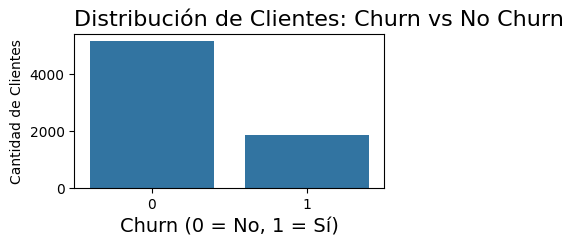

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# Conteo de valores
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(data=df_f, x='churn')
ax.set_title('Distribución de Clientes: Churn vs No Churn',
             loc='left', fontsize=16)
ax.set_xlabel('Churn (0 = No, 1 = Sí)', fontsize=14)
ax.set_ylabel('Cantidad de Clientes')
plt.show()

### **Recuento de evasión por variables categóricas**

In [19]:
df_f.customer_gender.unique()

array(['Female', 'Male'], dtype=object)

In [20]:
Genero_Female = ['Female']
Female = df_f.query('@Genero_Female in customer_gender')
Genero_Male = ['Male']
Male = df_f.query('@Genero_Male in customer_gender')

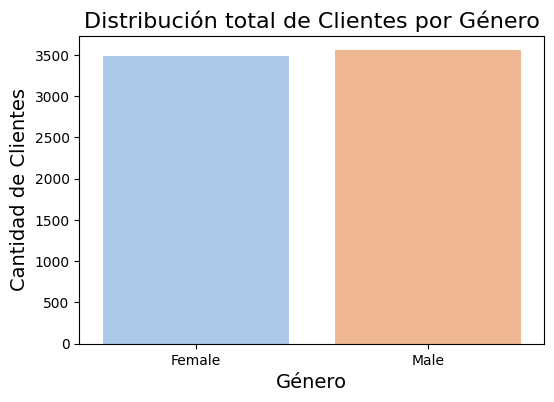

In [21]:
#Total de clientes Femeninos y Masculinos
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df_f, x='customer_gender', hue='customer_gender', ax=ax, palette='pastel', legend=False)
ax.set_title('Distribución total de Clientes por Género', loc='center', fontsize=16)
ax.set_xlabel('Género', fontsize=14)
ax.set_ylabel('Cantidad de Clientes', fontsize=14)
plt.show()

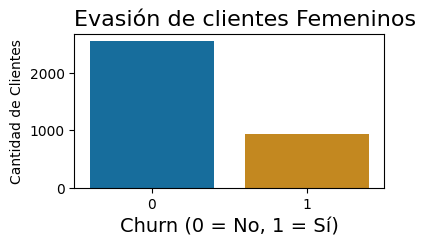

In [22]:
#Distribución de evasión de clientes femeninos
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(data=Female, x='churn', hue='churn', palette='colorblind', legend=False)
ax.set_title('Evasión de clientes Femeninos',
             loc='left', fontsize=16)
ax.set_xlabel('Churn (0 = No, 1 = Sí)', fontsize=14)
ax.set_ylabel('Cantidad de Clientes')
plt.show()

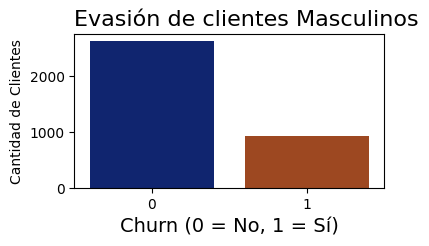

In [23]:
#Distribución de evasión de clientes masculinos
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(data=Male, x='churn',hue='churn', palette='dark', legend=False)
ax.set_title('Evasión de clientes Masculinos',
             loc='left', fontsize=16)
ax.set_xlabel('Churn (0 = No, 1 = Sí)', fontsize=14)
ax.set_ylabel('Cantidad de Clientes')
plt.show()

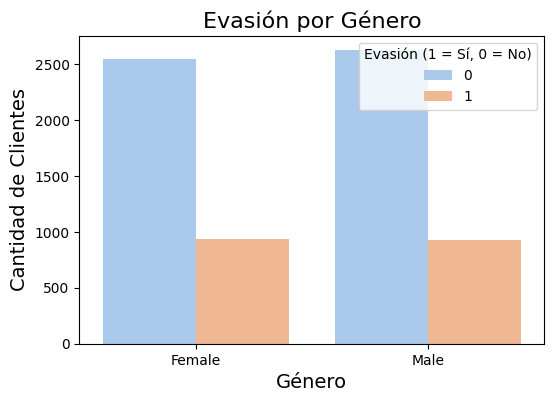

In [24]:
#Grafica general de Evasión por Genero
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df_f, x='customer_gender', hue='churn', palette='pastel', ax=ax)
ax.set_title('Evasión por Género', fontsize=16)
ax.set_xlabel('Género', fontsize=14)
ax.set_ylabel('Cantidad de Clientes', fontsize=14)
ax.legend(title='Evasión (1 = Sí, 0 = No)')
plt.show()

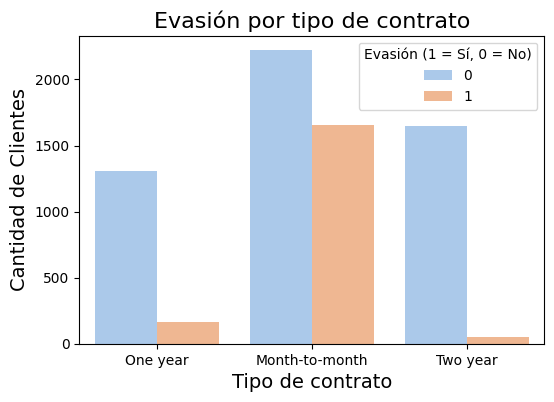

In [25]:
#Grafica de Evasión por tipo de contrato
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df_f, x='account_contract', hue='churn', palette='pastel', ax=ax)
ax.set_title('Evasión por tipo de contrato', fontsize=16)
ax.set_xlabel('Tipo de contrato', fontsize=14)
ax.set_ylabel('Cantidad de Clientes', fontsize=14)
ax.legend(title='Evasión (1 = Sí, 0 = No)')
plt.show()

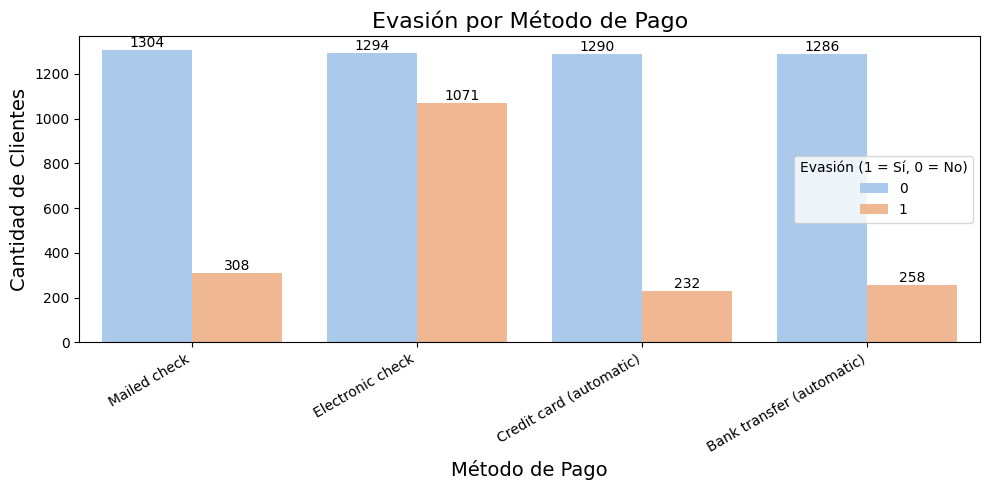

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))  # Aumentamos tamaño horizontal
sns.countplot(data=df_f, x='account_paymentmethod', hue='churn', palette='pastel', ax=ax)

# Título y etiquetas
ax.set_title('Evasión por Método de Pago', fontsize=16)
ax.set_xlabel('Método de Pago', fontsize=14)
ax.set_ylabel('Cantidad de Clientes', fontsize=14)
ax.legend(title='Evasión (1 = Sí, 0 = No)')

# Rotar etiquetas del eje X para mejor lectura
plt.xticks(rotation=30, ha='right')

# Agregar etiquetas de valor encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### **Conteo de evasión por variables numéricas**

In [27]:
df_f.sample(10)

customerid  churn customer_gender  customer_seniorcitizen  \
5373  7338-ERIVA      0            Male                       0   
874   1230-QAJDW      0            Male                       0   
6055  8263-OKETD      0          Female                       0   
5869  8024-XNAFQ      0          Female                       1   
4949  6754-WKSHP      0            Male                       0   
4566  6258-NGCNG      0            Male                       0   
4271  5875-YPQFJ      1            Male                       0   
6439  8849-GYOKR      1          Female                       0   
3225  4503-BDXBD      1            Male                       0   
6984  9620-ENEJV      0          Female                       0   

      customer_partner  customer_dependents  customer_tenure  \
5373                 0                    1               39   
874                  0                    0                3   
6055                 0                    0               20   
5869                 0                    0               72   
4949                 0                    1               30   
4566                 0                    0                7   
4271                 0                    0                1   
6439                 1                    0               54   
3225                 0                    0               11   
6984                 0                    0                6   

      phone_phoneservice  phone_multiplelines internet_internetservice  ...  \
5373                   0                    0                      DSL  ...   
874                    1                    1                      DSL  ...   
6055                   1                    1                      DSL  ...   
5869                   1                    1              Fiber optic  ...   
4949                   1                    1                        0  ...   
4566                   1                    1                        0  ...   
4271                   1                    0              Fiber optic  ...   
6439                   1                    1              Fiber optic  ...   
3225                   1                    0              Fiber optic  ...   
6984                   1                    0              Fiber optic  ...   

      internet_deviceprotection  internet_techsupport  internet_streamingtv  \
5373                          0                     1                     1   
874                           0                     1                     1   
6055                          0                     1                     0   
5869                          1                     1                     0   
4949                          0                     0                     0   
4566                          0                     0                     0   
4271                          0                     0                     0   
6439                          0                     0                     1   
3225                          0                     0                     0   
6984                          0                     0                     0   

      internet_streamingmovies  account_contract  account_paperlessbilling  \
5373                         0          One year                         0   
874                          0    Month-to-month                         1   
6055                         1    Month-to-month                         1   
5869                         1          Two year                         1   
4949                         0          One year                         0   
4566                         0    Month-to-month                         0   
4271                         0    Month-to-month                         1   
6439                         1          One year                         0   
3225                         0    Month-to-month                         0   
6984                         0    Month-to-

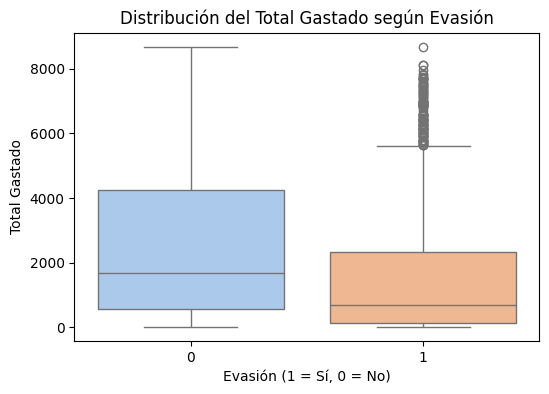

In [30]:
#Evasión con respecto a la cuenta total de los clientes
import seaborn as sns
import matplotlib.pyplot as plt
# Boxplot para Total Gastado vs Evasión
plt.figure(figsize=(6,4))
sns.boxplot(data=df_f, x='churn', hue='churn', y='account_charges_total', palette='pastel', legend=False)
plt.title('Distribución del Total Gastado según Evasión')
plt.xlabel('Evasión (1 = Sí, 0 = No)')
plt.ylabel('Total Gastado')
plt.show()

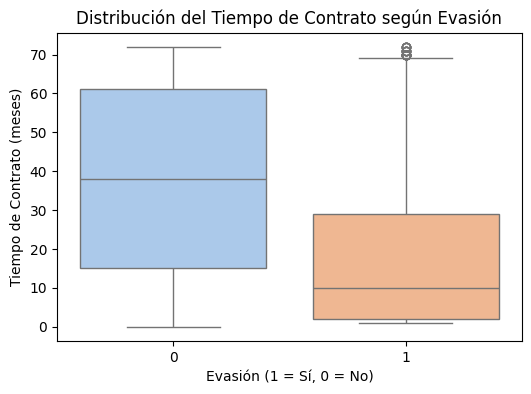

In [33]:
# Boxplot para Tiempo de Contrato vs Evasión
plt.figure(figsize=(6,4))
sns.boxplot(data=df_f, x='churn', hue='churn', y='customer_tenure', palette='pastel', legend=False)
plt.title('Distribución del Tiempo de Contrato según Evasión')
plt.xlabel('Evasión (1 = Sí, 0 = No)')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

### **Análisis de correlación entre variables**

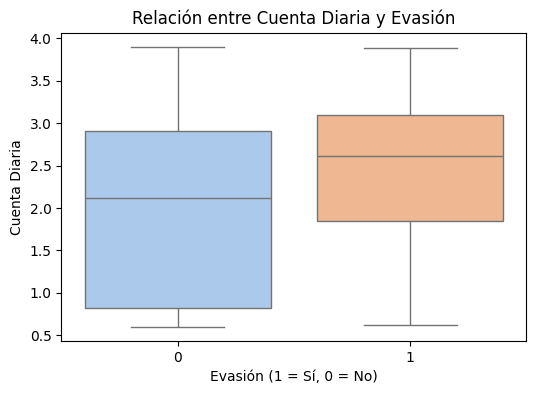

In [43]:
#Relación entre cuenta diaria y evasión
# Boxplot: cuenta diaria vs evasión
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_f, x='churn', hue='churn', y='cuentas_diarias', palette='pastel', legend=False)
plt.title('Relación entre Cuenta Diaria y Evasión')
plt.xlabel('Evasión (1 = Sí, 0 = No)')
plt.ylabel('Cuenta Diaria')
plt.show()

In [53]:
#Relación entre número de servicios contratados y evasión
df_f['total_servicios'] = df_f[['phone_phoneservice', 'phone_multiplelines', 'internet_onlinesecurity', 'internet_onlinebackup',
                          'internet_deviceprotection', 'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies']].sum(axis=1)

In [54]:
print(df_f[['total_servicios', 'churn']].corr())

                 total_servicios     churn
total_servicios         1.000000 -0.067264
churn                  -0.067264  1.000000


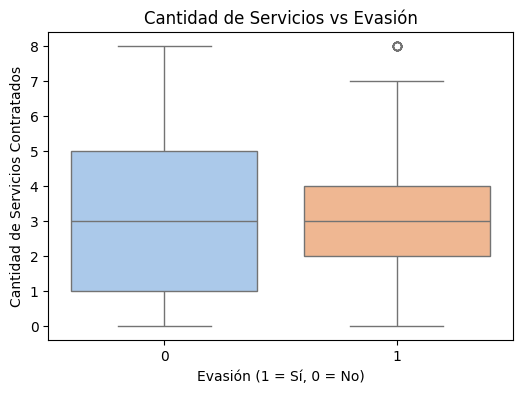

In [55]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_f, x='churn', hue='churn', y='total_servicios', palette='pastel', legend=False)
plt.title('Cantidad de Servicios vs Evasión')
plt.xlabel('Evasión (1 = Sí, 0 = No)')
plt.ylabel('Cantidad de Servicios Contratados')
plt.show()